In [95]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score



In [20]:
dataset = pd.read_csv('BasicModel.csv')

dataset = dataset.dropna()




In [21]:
dataset.shape

(370, 9)

In [22]:
dataset.describe()

,L*,SST,Age,Depth (amcd),Alkane,Alkane1,Alkanol,Alkanol1
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,69.273324,15.045189,298.089270,13.569243,93.996162,338.850973,53.697297,237.909676
std,8.831273,2.219039,247.433737,11.521146,74.432824,249.090837,58.012051,255.191827
min,47.140000,7.980000,6.910000,0.250000,0.790000,3.630000,0.470000,3.080000
25%,61.432500,13.460000,180.597500,8.685000,35.772500,133.162500,11.770000,56.480000
50%,70.050000,15.275000,338.505000,14.970000,75.960000,288.015000,30.670000,139.590000
75%,75.765000,16.475000,369.637500,16.575000,131.967500,475.337500,76.437500,333.975000
max,85.830000,22.310000,2706.930000,128.590000,458.040000,1608.700000,333.890000,2137.050000


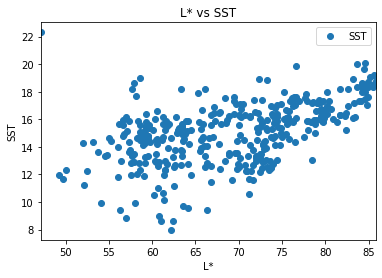

In [23]:
dataset.plot(x='L*', y='SST', style='o')  
plt.title('L* vs SST')  
plt.xlabel('L*')  
plt.ylabel('SST')  
plt.show()

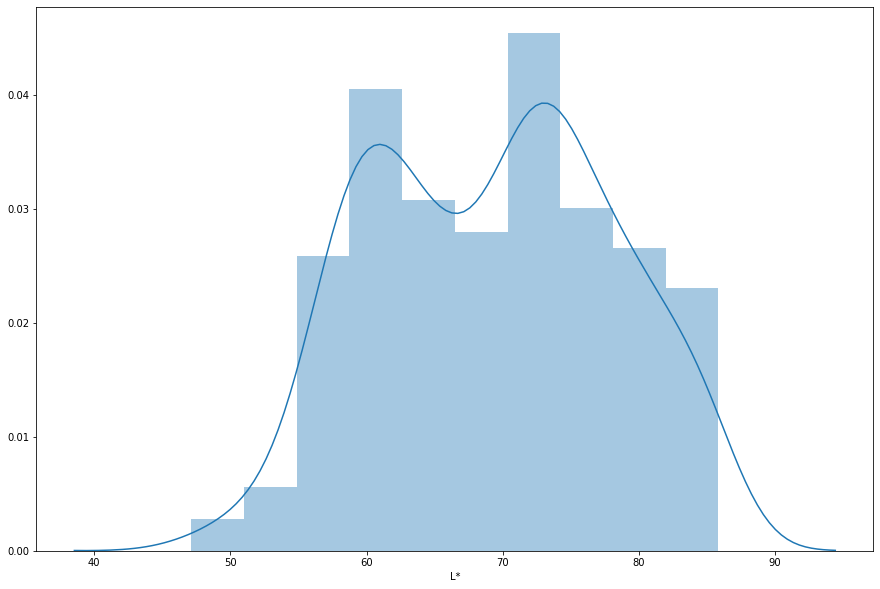

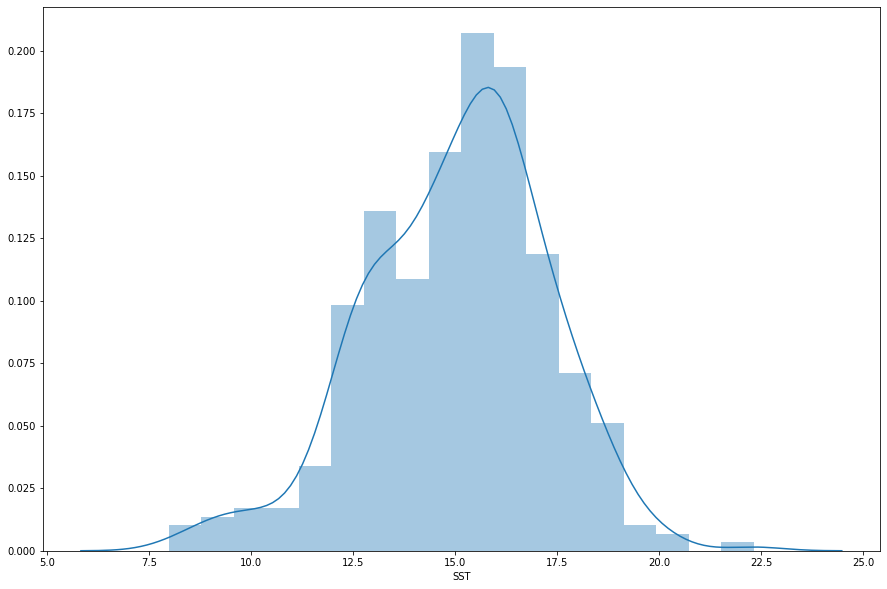

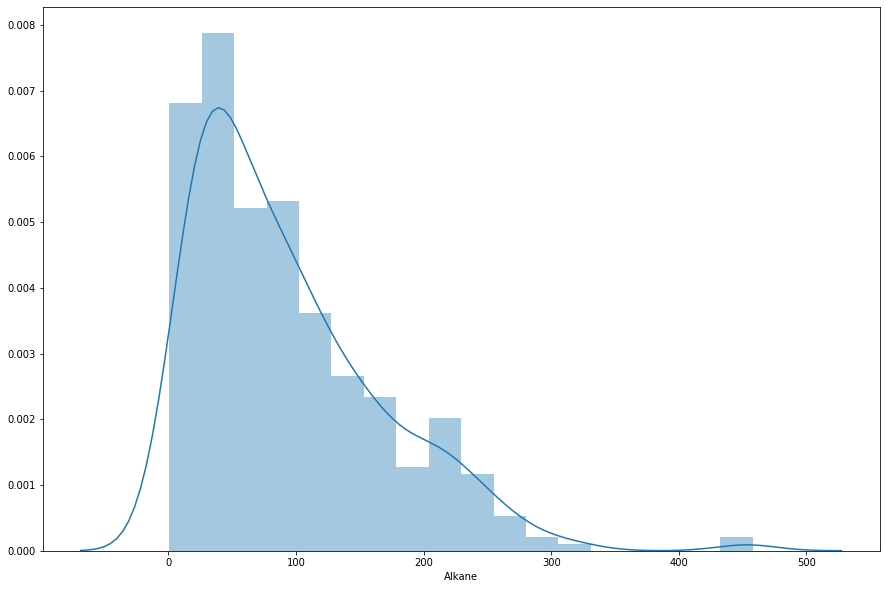

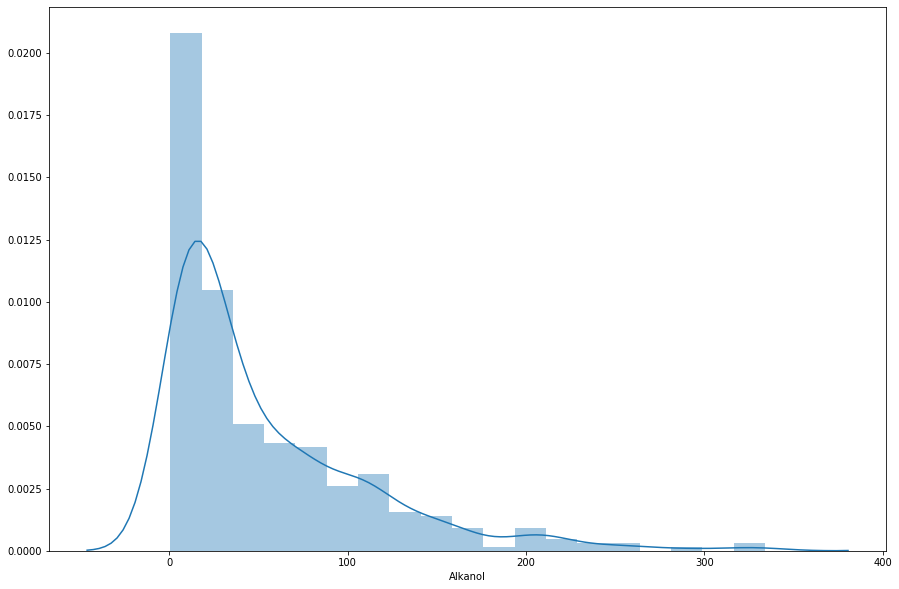

In [24]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['L*'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['SST'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkane'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkanol'])


In [25]:
X = dataset['L*'].values.reshape(-1,1)
y = dataset['SST'].values.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[5.97291201]
[[0.13038157]]


In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

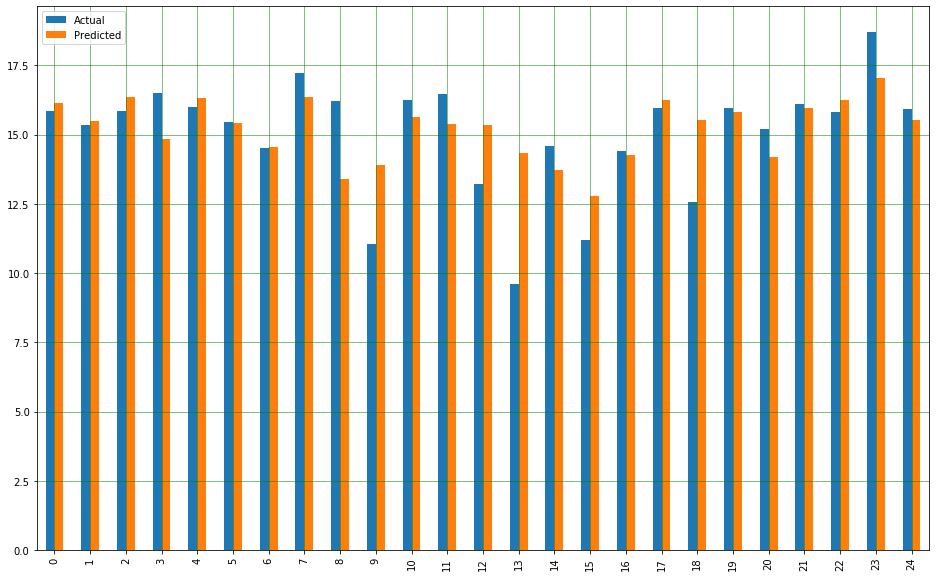

In [31]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

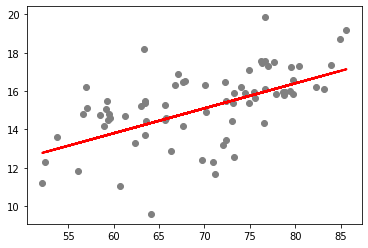

In [32]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.233478210298808
Mean Squared Error: 2.5483351521994173
Root Mean Squared Error: 1.596350573088323


Ok, not good.  We will try to CV to see if that improves, but all in all the data set is not big enough to make a difference.



Let's try a SVM; some CV; and then move onto multivariate

In [34]:
dataset.shape

(370, 9)

In [62]:
X_data1 = dataset.drop(columns = ['SST','Hole,Core,Section,Interval'])
y_data1 = dataset.drop(columns = ['L*','Hole,Core,Section,Interval','Age','Depth (amcd)','Alkane','Alkane1','Alkanol','Alkanol1'])

In [63]:
X_data1_scaled = preprocessing.scale(X_data1)
y_data1 = y_data1.values.reshape(-1,1)
X_data1_scaled.shape

(370, 7)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
clf = SVR(kernel='rbf', C=0.5).fit(X_train, y_train.ravel())
clf.score(X_test, y_test.ravel())          

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5179605764291477

In [65]:
def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid)
    #would need to add back in ,cv = nfolds after param_grid
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [66]:
svc_param_selection(X_train,y_train.ravel())

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
clf1 = SVR(kernel='rbf', C=20,gamma = 0.01).fit(X_train, y_train.ravel())
clf1.score(X_test, y_test.ravel())                    


0.5565248612182867

none of the results are very good or helpful; let's try something else

In [78]:
from sklearn.model_selection import cross_val_score

clf2 = SVR(kernel='rbf', C=20,gamma = 0.01)
scores = cross_val_score(clf2,X_data1_scaled,y_data1.ravel(), cv = 30)
scores



array([ -0.04650588,   0.0589188 ,  -0.14910426,  -1.0110911 ,
        -0.39137403,  -1.05496641,  -0.85976077,  -0.92418697,
         0.11133778,   0.19099662,   0.58035284,  -1.08765817,
        -0.16381123,   0.23539523,  -2.26314417,  -3.16488691,
        -0.05459828,  -0.44387344,  -3.16602236, -14.26234315,
       -30.31076099,  -3.66691624,  -0.48421764,  -0.51640222,
        -0.17300789,  -0.58228875,   0.47569391,   0.27140408,
        -5.76975754,  -8.42955441])

time to do some MLR...

X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
MLR_model = LinearRegression()
MLR_model.fit(X_train,y_train.ravel())
pred = MLR_model.fit(X_test,y_test.ravel())

#Test_RMSE= (np.sqrt(mean_squared_error(y_test.ravel(), pred)))
Test_r2 = r2_score(y_test.ravel(),pred)

#print(Test_RMSE)
print(Test_r2)

In [1]:
from MLR import MyLinearRegression as mlr
import numpy as np


ModuleNotFoundError: No module named 'MLR'